# 3.1 Churn prediction project

- Dataset: 
https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv



# 3.2 Data preparation

- Download the data, read it in with pandas
- Look at the data
- Make column names and values look uniform
- Check if all the columns read correctly
- Check if the churn variable needs any preparation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# data = 'https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
# !wget $data -O data-week-3.csv

In [4]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [6]:
df.sample(9).T

,3720,1305,2523,2532,4049,4631,1581,1933,3026
customerid,1097-fspvw,4945-rvmte,9081-wwxkp,9825-ycxwz,6199-iwkgc,2462-xiijb,2782-jeebu,1964-svlea,6127-isgtu
gender,female,female,female,female,female,male,male,male,female
seniorcitizen,0,0,0,1,1,0,0,0,0
partner,no,no,yes,no,yes,no,no,no,yes
dependents,no,no,yes,no,no,no,no,no,no
tenure,42,28,47,41,46,5,21,20,16
phoneservice,yes,yes,yes,yes,yes,yes,no,yes,yes
multiplelines,no,no,no,no,yes,yes,no_phone_service,no,yes
internetservice,dsl,dsl,no,fiber_optic,fiber_optic,fiber_optic,dsl,no,fiber_optic
onlinesecurity,yes,no,no_internet_service,no,no,no,no,no_internet_service,no


In [7]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [8]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [9]:
# df[tc.isnull()][['customerid', 'totalcharges']]

In [10]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [11]:
df.totalcharges = df.totalcharges.fillna(0)

In [12]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [13]:
df.churn = (df.churn == 'yes').astype(int)

In [14]:
df.churn.sample(7)

1693    0
2914    0
2013    0
5105    1
661     0
3617    1
6467    0
Name: churn, dtype: int64

# 3.3 Setting up the validation framework

- Perform the train/validation/test split with Scikit-Learn

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# carving out the test set and the full train set
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [17]:
len(df_full_train), len(df_test)

(5634, 1409)

In [18]:
# carving out the validation set from the full train set 
# (to get 20% of original dataset, it has to be 25% of full train set)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [19]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [20]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [22]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# 3.4 EDA

- Check missing values
- Look at the target variable(churn)
- Look at numerical and categorical variables

In [23]:
df_full_train = df_full_train.reset_index(drop=True)

In [24]:
df_full_train.sample(5)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2006,4140-wjaww,female,0,no,no,5,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,credit_card_(automatic),19.85,108.05,1
5022,5285-mvehd,female,0,yes,no,56,yes,no,fiber_optic,yes,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),105.60,6068.65,0
1392,1494-ejzdw,female,0,yes,yes,10,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.15,220.80,0
944,9494-mrnyx,male,0,no,no,10,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.05,786.30,0
964,8091-ttvax,male,0,yes,no,58,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,no,credit_card_(automatic),100.35,5681.10,0


In [25]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [26]:
df_full_train.churn.value_counts(normalize=True)   # churn rate

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [27]:
# churn rate
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [28]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [29]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [30]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [31]:
df_full_train[categorical].nunique()  # calculates the number of unique values for each column

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# 3.5 Feature importance: Churn rate and risk ratio

Feature importance analysis (part of EDA)-identifying which features affect our target variable

- Churn rate
- Risk ratio
- Mutual information - later

### Churn rate

In [32]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [33]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [34]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [35]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [36]:
 df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [37]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [38]:
global_churn - churn_partner

0.06493474245795922

In [39]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [40]:
global_churn - churn_no_partner

-0.05984095297455855

In [41]:
global_churn - churn_female

-0.006855983216553063

In [42]:
global_churn - churn_male

0.006754520462819769

### Risk ratio

In [43]:
churn_no_partner / global_churn

1.2216593879412643

In [44]:
churn_partner / global_churn

0.7594724924338315

SQL query


SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;


In [45]:
from IPython.display import display

In [46]:
# above SQL query in pandas

for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# 3.6 Feature importance: Mutual information

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

In [47]:
from sklearn.metrics import mutual_info_score

In [48]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [49]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [50]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [51]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [52]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# 3.7 Feature importance: Correlation

How about numerical columns?
- Correlation coefficient

In [53]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [54]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [55]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [56]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

In [57]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [58]:
df_full_train[(df_full_train.tenure > 20) & (df_full_train.tenure <= 50)].churn.mean()

0.2147165259348613

In [59]:
df_full_train[df_full_train.tenure > 50].churn.mean()

0.09025270758122744

# 3.8 One-hot encoding
- Use Scikit-Learn to encode categorical features

In [60]:
from sklearn.feature_extraction import DictVectorizer

In [61]:
#df_train[['gender', 'contract']].iloc[:100]

In [62]:
#dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')

In [63]:
#dv = DictVectorizer(sparse=False)

In [64]:
#dv.fit(dicts)

In [65]:
#dv.get_feature_names()

In [66]:
#dv.transform(dicts)

In [67]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [68]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [69]:
dv = DictVectorizer(sparse=False)

In [70]:
x_train = dv.fit_transform(train_dicts)

In [71]:
x_train.shape

(4225, 45)

In [72]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [73]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [74]:
x_val = dv.transform(val_dicts)

# 3.9 Logistic regression
- Binary classification
- Linear vs logistic regression

In [75]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [76]:
z = np.linspace(-7, 7, 51)

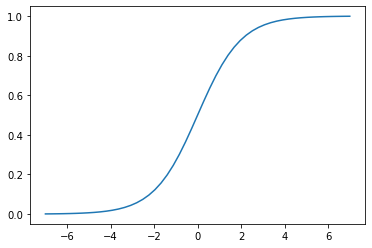

In [77]:
plt.plot(z, sigmoid(z))

In [78]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [79]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

# 3.10 Training logistic regression with Scikit-Learn
- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [82]:
model.intercept_[0]

-0.10900132903374983

In [83]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.216, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [84]:
model.predict(x_train) # hard pred ictions

array([0, 1, 1, ..., 1, 0, 1])

In [85]:
y_pred = model.predict_proba(x_train)[:, 1] # soft predictions

In [86]:
churn_decision = (y_pred >= 0.5)

In [87]:
(y_val == churn_decision).mean()

/tmp/ipykernel_43099/3175986310.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  (y_val == churn_decision).mean()


AttributeError: 'bool' object has no attribute 'mean'

In [ ]:
y_val

In [ ]:
df_pred = pd

In [ ]:
churn_decision.astype(int)

# 3.11 Model interpretation
- Look at the coefficients
- Train a smaller model with fewer features

In [ ]:
model.coef_[0].round(3)

In [ ]:
dv.get_feature_names()

In [ ]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

In [ ]:
small = ['contract', 'tenure', 'monthlycharges']

In [ ]:
df_train[small].iloc[:10].to_dict(orient='records')

In [ ]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [ ]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

In [ ]:
dv_small.get_feature_names()

In [ ]:
x_train_small = dv_small.transform(dicts_train_small)

In [ ]:
model_small = LogisticRegression()
model_small.fit(x_train_small, y_train)

In [ ]:
w0 = model_small.intercept_[0]
w0

In [ ]:
w = model_small.coef_[0]
w.round(3)

In [ ]:
dict(zip(dv_small.get_feature_names(), w.round(3)))

# 3.12 Using the model

In [ ]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [ ]:
dv = DictVectorizer(sparse=False)
x_full_train = dv.fit_transform(dicts_full_train)

In [ ]:
y_full_train = df_full_train.churn.values

In [ ]:
model = LogisticRegression()
model.fit(x_full_train, y_full_train)

In [ ]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [ ]:
x_test = dv.transform(dicts_test)

In [ ]:
y_pred = model.predict_proba(x_test)[:, 1]

In [107]:
churn_decision = (y_pred >= 0.5)

In [109]:
len()

4225

In [110]:
(churn_decision == y_test).mean()

/tmp/ipykernel_43099/58522151.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  (churn_decision == y_test).mean()


AttributeError: 'bool' object has no attribute 'mean'

In [ ]:
customer = dicts_test[-1]
customer

In [ ]:
x_small = dv.transform([customer])

In [ ]:
model.predict_proba(x_small)[0, 1]

In [88]:
y_test[-1]

1

# 3.13 Summary
- Feature importance - risk, mutual information, correlation
- One-hot encoding can be implemented with DictVectorizer
- Logistic regression - linear model like linear regression
- Output of log reg - probability
- Interpretation of weights is similar to linear regression